# Principal Component Analysis (PCA)
This notebook goes through the implementation of Principal Component Analysis (PCA) from scratch, using the Scikit-Learn (sklearn) library and how it can be used for visualizing a n-dimensional dataset in 2 dimensions.

### Table of contents
1. [Introduction](#Introduction)<br>
2. [PCA from scratch](#PCA-from-scratch)<br>
    2.1 [Preparations](#Preparations)<br>
    2.2 [Load the data](#Load-the-data)<br>
    2.3 [Standardize the features](#Standardize-the-features)<br>
    2.4 [Compute covariance matrix](#Compute-covariance-matrix)<br>
    2.5 [Compute eigenvalues and -vectors from covariance matrix](#Compute-eigenvalues-and--vectors-from-the-covariance-matrix)<br>
    2.6 [Sort the eigenvectors by eigenvalues](#Sort-the-eigenvectors-by-eigenvalues)<br>
    2.7 [Select principal components](#Select-principal-components)<br>
    2.8 [Transform the data](#Transform-the-data)<br>
    2.9 [Plot the data](#Plot-the-data)
3. [PCA using scikit-learn](#PCA-using-scikit-learn-sklearn)<br>
    3.1 [Preparations](#Preparations-sklearn)<br>
    3.2 [Load the data](#Load-the-data-sklearn)<br>
    3.3 [Split dataset into training and test sets](#Split-data-set-into-training-and-test-sets-sklearn)<br>
    3.4 [Standardize the features](#Standardize-the-features-sklearn)<br>
    3.5 [Decide number of principal componenets to include](#Decide-number-of-principal-componenets-to-include-sklearn)<br>
    3.6 [Run PCA with specified number of principal components](#Run-PCA-with-specified-number-of-principal-components-sklearn)
4. [PCA for visualizing n-dimensional a dataset in 2 dimensions](#PCA-for-visualizing-a-n-dimensional-dataset-in-2-dimensions-visualization)<br>
    4.1 [Preparations](#Preparations-visualization)<br>
    4.2 [Load the data](#Load-the-data-visualization)<br>
    4.3 [Standardize the features](#Standardize-the-features-visualization)<br>
    4.4 [Run PCA with two principal components](#Run-PCA-with-two-principal-components-visualization)<br>
    4.5 [Plot the data](#Plot-the-data-visualization)<br>

## 1. Introduction<a id="Introduction"/>

### Principal Component Analysis (PCA)
Principal Component Analysis (PCA) is a dimensionality-reduction method, that is often used for reducing the dimensionality of datasets. PCA creates a representation of the variability within the data, in as few dimensions as possible – while still retaining most of variation from the original dataset.

PCA goes through a set of steps; standardization of data, computing covariance matrix, computing eigenvectors and -values of the covariance matrix, sorting eigenvectors according to corresponding eigenvalues in decreasing order (in order of significance), specifying numbers of eigenvectors (principal components) from the sorted eigenvector-matrix to be used to project the original data onto a new, lower-dimensional, feature subspace.

## 2. PCA from scratch<a id="PCA-from-scratch"/>
The following will go through an implemented of PCA from scratch using Python.

### 2.1 Preparations<a id="Preparations"/>

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

### 2.2 Load the data<a id="Load-the-data"/>
We'll use the well-known Iris dataset, which can be loaded using the sklearn library.

In [2]:
# Load iris data
iris = load_iris()

In [3]:
# Create the feature matrix
X = iris.data
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
# Create the target vector
y = iris["target"]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
# Target names
target_names = iris.target_names
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 2.3 Standardize the features<a id="Standardize-the-features"/>

In [6]:
# Standardize the features using StandardScaler from Scikit-Learn
sc = StandardScaler()
X_std = sc.fit_transform(X)
X_std[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

### 2.4 Compute covariance matrix<a id="Compute-covariance-matrix"/>

In [7]:
# Compute the covariance matrix from the standardized data
cov_matrix = np.cov(X_std.T)
cov_matrix[:5]

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

### 2.5 Compute eigenvalues and -vectors from the covariance matrix<a id="Compute-eigenvalues-and--vectors-from-the-covariance-matrix"/>

In [8]:
# Compute eigenvalues and -vectors from the covariance matrix
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
eigen_values[:5], eigen_vectors[:5]

(array([2.93808505, 0.9201649 , 0.14774182, 0.02085386]),
 array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
        [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
        [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
        [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

### 2.6 Sort the eigenvectors by eigenvalues<a id="Sort-the-eigenvectors-by-eigenvalues"/>

In [9]:
# Sort eigenvalues in decending order
sorted_eigen_values = eigen_values[(np.argsort(eigen_values)[::-1])]
sorted_eigen_values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [10]:
# Sort eigenvectors by corresponding eigenvalues in decending order
sorted_eigen_vectors = eigen_vectors[:,(np.argsort(eigen_values)[::-1])]
sorted_eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

### 2.7 Select principal components<a id="Select-principal-components"/>

In [11]:
# Total eigen values
total = sum(eigen_values)

# Explained variance per eigenvector (principal component)
var_per_component = [(i / total) * 100 for i in sorted_eigen_values]

# Cumulative variance
cumulative_var = np.cumsum(var_per_component)

print(f"Variance per component:\n{var_per_component}")
print(f"Cumulative variance:\n{cumulative_var}")

Variance per component:
[72.96244541329989, 22.850761786701753, 3.668921889282865, 0.5178709107154905]
Cumulative variance:
[ 72.96244541  95.8132072   99.48212909 100.        ]


We can see that the first two principal components can explain the majority of the variance - approx. 96%.

In [12]:
# Select number (n) of principal components
n_components = 2 # We choose 2, since 2 of the most significant principal components account for the majority of the variance

# Create W matrix
W_matrix = sorted_eigen_vectors[:,0:n_components]
W_matrix

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

### 2.8 Transform the data<a id="Transform-the-data"/>

In [13]:
# Project data onto principal components to create new, lower-dimensional, feature subspace.
X_pca = X_std.dot(W_matrix)
X_pca[:5]

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538]])

In [14]:
# Create pandas DataFrame from new, reduced, dataset
df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])

# Concatinate with target variables
df = pd.concat([df, pd.DataFrame(data=y, columns=["Target"])], axis=1)

# Rename Target vector
df["Target"] = target_names[df["Target"]]
df

,PC1,PC2,Target
0,-2.264703,-0.480027,setosa
1,-2.080961,0.674134,setosa
2,-2.364229,0.341908,setosa
3,-2.299384,0.597395,setosa
4,-2.389842,-0.646835,setosa
...,...,...,...
145,1.870503,-0.386966,virginica
146,1.564580,0.896687,virginica
147,1.521170,-0.269069,virginica
148,1.372788,-1.011254,virginica


### 2.9 Plot the data<a id="Plot-the-data"/>

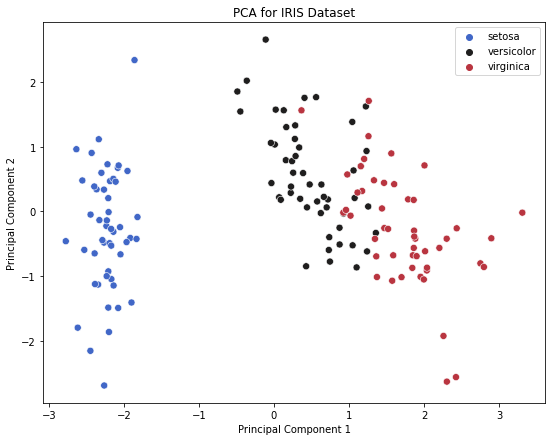

In [15]:
# Create plot for visualizing results
plt.figure(figsize=(9,7))
sb.scatterplot(data=df, x="PC1", y="PC2", hue=df["Target"], s=50, palette="icefire")
plt.title("PCA for IRIS Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(loc="upper right")
plt.show()

## 3. PCA using scikit-learn<a id="PCA-using-scikit-learn-sklearn"/>
The following will go through an implemented of PCA using the Scikit-Learn (Sklearn) library.

### 3.1 Preparations<a id="Preparations-sklearn"/>

In [16]:
# Import required libraries
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

### 3.2 Load the data<a id="Load-the-data-sklearn"/>
We'll use the well-known Iris dataset, which can be loaded using the sklearn library.

In [17]:
# Load iris data
iris = load_iris()

In [18]:
# Create the feature matrix
X = iris.data
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [19]:
# Create the target vector
y = iris["target"]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
# Target names
target_names = iris.target_names
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 3.3 Split dataset into training and test sets<a id="Split-data-set-into-training-and-test-sets-sklearn"/>

In [21]:
# Split the dataset into training and test sets using sklearn train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 3.4 Standardize the features<a id="Standardize-the-features-sklearn"/>

In [22]:
# Standardize the features using StandardScaler from Scikit-Learn
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std[:5], X_test_std[:5]

(array([[-0.04554992, -0.80343511,  0.78299984,  0.94136029],
        [-0.41823111,  2.61543769, -1.36035361, -1.32056549],
        [ 0.82403952, -0.11966055,  1.01471373,  0.80830583],
        [-0.41823111,  1.01996372, -1.41828208, -1.32056549],
        [-0.41823111, -1.71513452,  0.14578665,  0.14303354]]),
 array([[ 0.69981246, -0.57551025,  1.0726422 ,  1.34052366],
        [ 0.69981246, -0.3475854 ,  0.31957207,  0.14303354],
        [-0.04554992,  2.15958798, -1.47621055, -1.32056549],
        [-0.29400405, -0.57551025,  0.6671429 ,  1.07441475],
        [ 2.19053723, -0.11966055,  1.65192692,  1.2074692 ]]))

### 3.5 Decide on number of principal componenets to include<a id="Decide-number-of-principal-componenets-to-include-sklearn"/>
Run PCA without specifying the number of principal components. This is used to decide how many principal components to include when performing PCA.

In [23]:
# Create instance of PCA object
pca_wo_pc = PCA()

# Transform and fit on training dataset
pca_train_std_wo_pc = pca_wo_pc.fit_transform(X_train_std)

# Transform test dataset
pca_test_std_wo_pc = pca_wo_pc.transform(X_test_std)

In [24]:
# Explained variance principal component
var_per_component = pca_wo_pc.explained_variance_ratio_

# Cumulative variance
cumulative_var = np.cumsum(pca_wo_pc.explained_variance_ratio_)

print(f"Variance per component:\n{var_per_component}")
print(f"Cumulative variance:\n{cumulative_var}")

Variance per component:
[0.72848922 0.22892778 0.03706583 0.00551717]
Cumulative variance:
[0.72848922 0.957417   0.99448283 1.        ]


We can see that the first two principal components can explain the majority of the variance - approx. 96%.

### 3.6 Run PCA with specified number of principal components<a id="Run-PCA-with-specified-number-of-principal-components-sklearn"/>
Creates feature matrix and target vector to be used by chosen machine learning model.

In [25]:
# Create instance of PCA object
pca = PCA(n_components=2) # We choose two principal components

# Transform and fit on training dataset
X_train = pca.fit_transform(X_train_std)

# Transform test dataset
X_test = pca.transform(X_test_std)

## 4. PCA for visualizing a n-dimensional dataset in 2 dimensions<a id="PCA-for-visualizing-a-n-dimensional-dataset-in-2-dimensions-visualization"/>
The following will go through the process of transforming a n-dimensional dataset (in this case 4) to a 2 dimensional for visualisation purposes.

### 4.1 Preparations<a id="Preparations-visualization"/>

In [26]:
# Import required libraries
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

### 4.2 Load the data<a id="Load-the-data-visualization"/>
We'll use the well-known Iris dataset, which can be loaded using the sklearn library.

In [27]:
# Load iris data
iris = load_iris()

In [28]:
# Create the feature matrix
X = iris.data
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [29]:
# Create the target vector
y = iris["target"]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [30]:
# Target names
target_names = iris.target_names
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 4.3 Standardize the features<a id="Standardize-the-features-visualization"/>

In [31]:
# Standardize the features using StandardScaler from Scikit-Learn
sc = StandardScaler()
X_std = sc.fit_transform(X)
X_std[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

### 4.4 Run PCA with two principal components<a id="Run-PCA-with-two-principal-components-visualization"/>

In [32]:
# Create instance of PCA object
pca = PCA(n_components=2) # We choose two principal components

# Run PCA on dataset
pca_std = pca.fit_transform(X_std)

In [33]:
# Create pandas DataFrame from new, reduced, dataset
df = pd.DataFrame(data=pca_std, columns=["PC1", "PC2"])

# Concatinate with target variables
df = pd.concat([df, pd.DataFrame(data=y, columns=["Target"])], axis=1)

# Rename Target vector
df["Target"] = target_names[df["Target"]]
df[:5]

,PC1,PC2,Target
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


### 4.5 Plot the data<a id="Plot-the-data-visualization"/>

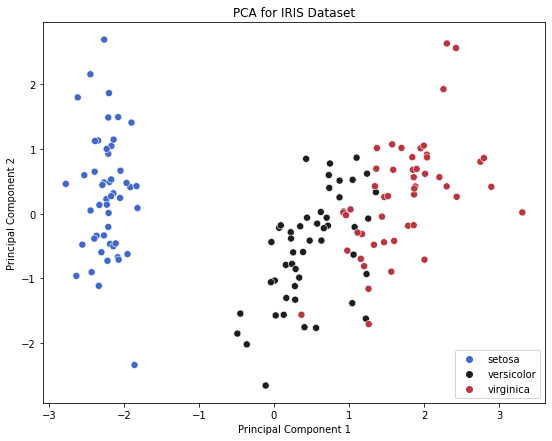

In [34]:
# Create plot for visualizing results
plt.figure(figsize=(9,7))
sb.scatterplot(data=df, x="PC1", y="PC2", hue=df["Target"], s=50, palette="icefire")
plt.title("PCA for IRIS Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(loc="lower right")
plt.show()